In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:
start = "2010-01-01"
end = "2021-11-01"

df = data.DataReader("AAPL","yahoo",start,end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-26,150.839996,149.009995,149.330002,149.320007,60893400.0,149.102402
2021-10-27,149.729996,148.490005,149.360001,148.850006,56094900.0,148.633087
2021-10-28,153.169998,149.720001,149.820007,152.570007,100077900.0,152.347656
2021-10-29,149.940002,146.410004,147.220001,149.800003,124850400.0,149.581696
2021-11-01,149.699997,147.800003,148.990005,148.960007,74588300.0,148.742920


In [6]:
df = df.reset_index()
df.head()

,index,Date,High,Low,Open,Close,Volume,Adj Close
0,0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452590
1,1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553027
2,2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
3,3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
4,4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [8]:
df = df.drop(["index","Date","Adj Close"], axis=1)

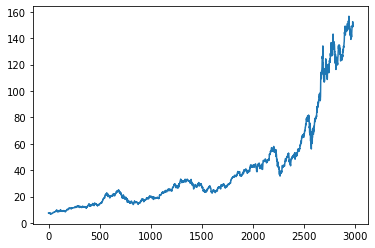

In [9]:
plt.plot(df.Close)

In [19]:
ma50 = df.Close.rolling(50).mean()
ma50

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2975    147.205399
2976    147.178599
2977    147.302799
2978    147.364799
2979    147.380200
Name: Close, Length: 2980, dtype: float64

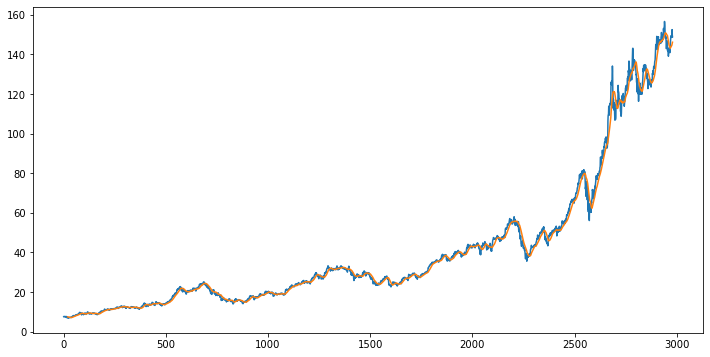

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma20)

In [20]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2975    143.8821
2976    144.1116
2977    144.3699
2978    144.5966
2979    144.8251
Name: Close, Length: 2980, dtype: float64

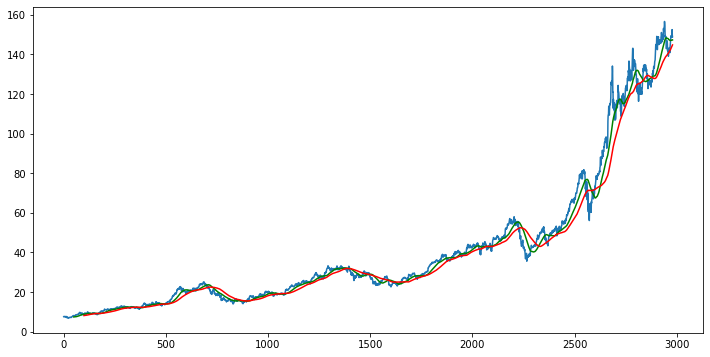

In [21]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma50,'g')
plt.plot(ma100,'r')

In [22]:
df.shape

(2980, 5)

In [25]:
#splitting data into trainig & testing


data_training = pd.DataFrame(df["Close"][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df["Close"][int(len(df)*0.70):int(len(df))])

In [37]:
data_training.shape

(2086, 1)

In [38]:
data_testing.shape

(894, 1)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
data_training_array = scaler.fit_transform(data_training)

In [39]:
len(data_training_array)

2086

In [40]:
data_testing_array = scaler.fit_transform(data_testing)
len(data_testing_array)

894

In [41]:
x_train = []
y_train = []

In [42]:
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [46]:
x_train

[array([[1.72964321e-02],
        [2.03335050e-02],
        [2.06761086e-02],
        [1.75186739e-02],
        [1.71575388e-02],
        [1.84538520e-02],
        [1.67223767e-02],
        [1.45093673e-02],
        [1.72223557e-02],
        [1.60927268e-02],
        [1.28519560e-02],
        [2.12872147e-02],
        [1.82223878e-02],
        [1.48334394e-02],
        [5.27781150e-03],
        [1.02037846e-02],
        [1.28612156e-02],
        [1.46575326e-02],
        [6.70374619e-03],
        [9.24719443e-06],
        [2.48148710e-03],
        [3.52779231e-03],
        [6.64818884e-03],
        [0.00000000e+00],
        [3.15741003e-03],
        [1.91666648e-03],
        [3.83335769e-03],
        [2.84259746e-03],
        [6.12966601e-03],
        [7.71302554e-03],
        [1.05093499e-02],
        [9.72231231e-03],
        [1.00741508e-02],
        [8.90747130e-03],
        [7.75005140e-03],
        [4.63891443e-03],
        [7.97229313e-03],
        [9.21303668e-03],
        [1.1

In [45]:
y_train

[0.04820412870171034,
 0.056759761560349814,
 0.060028323365339864,
 0.06368576183882882,
 0.06657469416975145,
 0.06580616330206632,
 0.05917646884729605,
 0.05452827013834036,
 0.05303751855048397,
 0.047361521378098015,
 0.05413012155029115,
 0.05690793919732298,
 0.05762088799794396,
 0.06263019706698525,
 0.06963027380139145,
 0.07390809023071121,
 0.0759451185933524,
 0.0723339902673773,
 0.0757414330646714,
 0.07307473010153037,
 0.07125065918712042,
 0.06912098580433265,
 0.07060249019775755,
 0.0593709071815455,
 0.055074571638243947,
 0.052250468568817016,
 0.0508245462424563,
 0.05238937428623991,
 0.06168572225391364,
 0.06114869267356035,
 0.06256539253060836,
 0.06040795283940728,
 0.0553245673144388,
 0.05618566902691413,
 0.05500049518231678,
 0.05356530093640577,
 0.049565246491694165,
 0.05540789096479748,
 0.05758384976998035,
 0.06200981911115447,
 0.06286167362919831,
 0.06225056759291783,
 0.06669505604807374,
 0.06380612371715111,
 0.06116721178754214,
 0.0603709

In [48]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [50]:
x_train.shape

(1986, 100, 1)

In [49]:
#ML Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [56]:
model = Sequential()
model.add(LSTM(units=50, activation = "relu",return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation = "relu",return_sequences=True
              ))
model.add(Dropout(0.3))




model.add(LSTM(units=80, activation = "relu",return_sequences=True
              ))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation = "relu"))
model.add(Dropout(0.5))



model.add(Dense(units=1))

In [57]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [58]:
model.compile(optimizer='adam',loss = "mean_squared_error")
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
63/63 [==============================] - 12s 152ms/step - loss: 0.0380
Epoch 2/50
63/63 [==============================] - 9s 143ms/step - loss: 0.0095
Epoch 3/50
63/63 [==============================] - 9s 138ms/step - loss: 0.0082
Epoch 4/50
63/63 [==============================] - 8s 132ms/step - loss: 0.0069
Epoch 5/50
63/63 [==============================] - 8s 131ms/step - loss: 0.0071
Epoch 6/50
63/63 [==============================] - 8s 133ms/step - loss: 0.0058
Epoch 7/50
63/63 [==============================] - 9s 135ms/step - loss: 0.0061
Epoch 8/50
63/63 [==============================] - 8s 134ms/step - loss: 0.0056
Epoch 9/50
63/63 [==============================] - 9s 138ms/step - loss: 0.0051
Epoch 10/50
63/63 [==============================] - 8s 133ms/step - loss: 0.0050
Epoch 11/50
63/63 [==============================] - 8s 131ms/step - loss: 0.0051
Epoch 12/50
63/63 [==============================] - 8s 132ms/step - loss: 0.0050
Epoch 13/50
63/63 [=====

In [59]:
model.save('keras_model.h5')

In [83]:
data_testing.head()

,Close
2086,44.560001
2087,44.459999
2088,43.200001
2089,41.430000
2090,41.310001


In [84]:
past_100_days = data_training.tail(100)

In [85]:
final_df = past_100_days.append(data_testing,ignore_index=True)

In [86]:
final_df

,Close
0,42.494999
1,43.285000
2,43.740002
3,43.742500
4,43.522499
...,...
989,149.320007
990,148.850006
991,152.570007
992,149.800003


In [87]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(994, 1)

In [88]:
x_test = []
y_test = []

In [89]:
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [90]:
x_test,y_test = np.array(x_test), np.array(y_test)

In [91]:
x_test.shape

(894, 100, 1)

In [92]:
y_test.shape

(894,)

In [93]:
#making Predictions
y_predicted = model.predict(x_test)

In [94]:
y_predicted.shape

(894, 1)

In [95]:
scaler.scale_

array([0.00825474])

In [96]:
scale_factor = 1/0.00825474

In [97]:
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

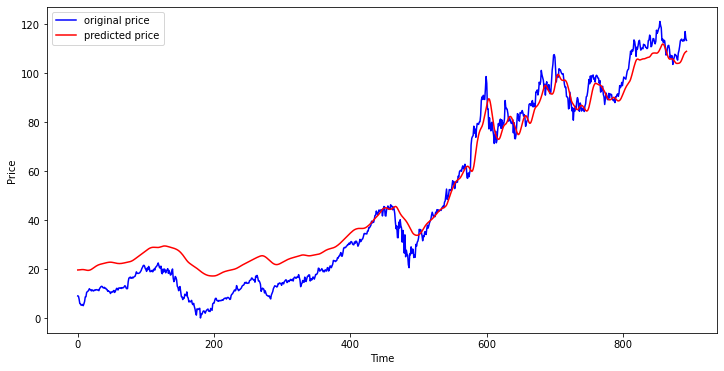

In [98]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [99]:
pip freeze

absl-py==0.13.0
adjustText==0.7.3
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
altair==4.1.0
anaconda-client==1.7.2
anaconda-navigator==2.0.4
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1610472525955/work
anyio @ file:///C:/ci/anyio_1620153418380/work/dist
appdirs==1.4.4
arch==5.0.1
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
arrow==1.1.1
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astor==0.8.1
astroid @ file:///C:/ci/astroid_1613501047216/work
astropy @ file:///C:/ci/astropy_1617745647203/work
astunparse==1.6.3
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1615918855173/work
Babel @ file:///tmp/build/80754af9/babel_1607110387436/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.csv==1.0.7
backports.ent

smart-open==5.2.1
smmap==5.0.0
sniffio @ file:///C:/ci/sniffio_1614030707456/work
snowballstemmer @ file:///tmp/build/80754af9/snowballstemmer_1611258885636/work
sortedcollections @ file:///tmp/build/80754af9/sortedcollections_1611172717284/work
sortedcontainers @ file:///tmp/build/80754af9/sortedcontainers_1606865132123/work
soupsieve @ file:///tmp/build/80754af9/soupsieve_1616183228191/work
spacy==3.1.2
spacy-legacy==3.0.8
Sphinx @ file:///tmp/build/80754af9/sphinx_1620777493457/work
sphinxcontrib-applehelp @ file:///home/ktietz/src/ci/sphinxcontrib-applehelp_1611920841464/work
sphinxcontrib-devhelp @ file:///home/ktietz/src/ci/sphinxcontrib-devhelp_1611920923094/work
sphinxcontrib-htmlhelp @ file:///home/ktietz/src/ci/sphinxcontrib-htmlhelp_1611920974801/work
sphinxcontrib-jsmath @ file:///home/ktietz/src/ci/sphinxcontrib-jsmath_1611920942228/work
sphinxcontrib-qthelp @ file:///home/ktietz/src/ci/sphinxcontrib-qthelp_1611921055322/work
sphinxcontrib-serializinghtml @ file:///home/kt

In [101]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
